<a href="https://colab.research.google.com/github/AkhilaGuptaP/Capstone/blob/main/3rdDraft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets_2/Airbnb NYC 2019.csv')
df.head().T

,0,1,2,3,4
id,2539,2595,3647,3831,5022
name,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,Cozy Entire Floor of Brownstone,Entire Apt: Spacious Studio/Loft by central park
host_id,2787,2845,4632,4869,7192
host_name,John,Jennifer,Elisabeth,LisaRoxanne,Laura
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan
neighbourhood,Kensington,Midtown,Harlem,Clinton Hill,East Harlem
latitude,40.64749,40.75362,40.80902,40.68514,40.79851
longitude,-73.97237,-73.98377,-73.9419,-73.95976,-73.94399
room_type,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt
price,149,225,150,89,80


In [ ]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
df['reviews_per_month'].fillna(0,inplace=True)


In [ ]:
columns_to_fill = ['last_review','name', 'host_name']

df[columns_to_fill]=df[columns_to_fill].fillna('NA')



In [ ]:
df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:

df.head().T

,0,1,2,3,4
id,2539,2595,3647,3831,5022
name,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,Cozy Entire Floor of Brownstone,Entire Apt: Spacious Studio/Loft by central park
host_id,2787,2845,4632,4869,7192
host_name,John,Jennifer,Elisabeth,LisaRoxanne,Laura
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan
neighbourhood,Kensington,Midtown,Harlem,Clinton Hill,East Harlem
latitude,40.64749,40.75362,40.80902,40.68514,40.79851
longitude,-73.97237,-73.98377,-73.9419,-73.95976,-73.94399
room_type,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt
price,149,225,150,89,80


In [ ]:
reviews_grp=df.groupby('neighbourhood_group')['number_of_reviews'].sum()

reviews_grp



neighbourhood_group
Bronx             28371
Brooklyn         486574
Manhattan        454569
Queens           156950
Staten Island     11541
Name: number_of_reviews, dtype: int64

In [ ]:
reviews_grp=df.groupby('neighbourhood_group')['number_of_reviews'].sum().reset_index()

reviews_grp

,neighbourhood_group,number_of_reviews
0,Bronx,28371
1,Brooklyn,486574
2,Manhattan,454569
3,Queens,156950
4,Staten Island,11541


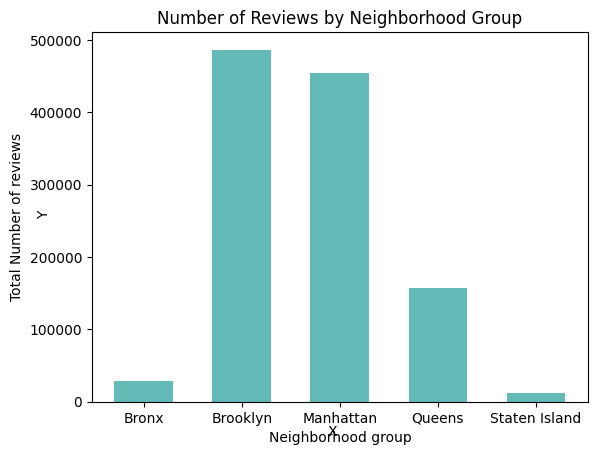

In [ ]:
fig,ax=plt.subplots()
ax.bar(reviews_grp['neighbourhood_group'],reviews_grp['number_of_reviews'],color='#63BAB6',width=0.6)

ax.set_xlabel('Neighborhood group')
ax.set_ylabel('Total Number of reviews')
ax.set_title('Number of Reviews by Neighborhood Group')
fig.text(0.5,0.04,'X',ha='center')
fig.text(0.04,0.5,'Y',va='center',rotation='vertical')
plt.show()

In [ ]:
df.head()
room_type_df=df['room_type'].value_counts()
room_type_df

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

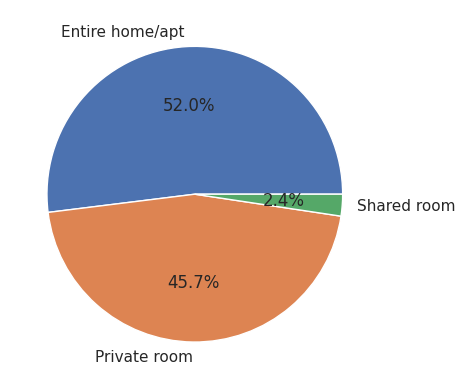

In [ ]:
sns.set()
plt.pie(room_type_df.values,labels=room_type_df.index,autopct='%1.1f%%') #,palette='muted'
plt.show()

In [ ]:
df.head().T

,0,1,2,3,4
id,2539,2595,3647,3831,5022
name,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,Cozy Entire Floor of Brownstone,Entire Apt: Spacious Studio/Loft by central park
host_id,2787,2845,4632,4869,7192
host_name,John,Jennifer,Elisabeth,LisaRoxanne,Laura
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan
neighbourhood,Kensington,Midtown,Harlem,Clinton Hill,East Harlem
latitude,40.64749,40.75362,40.80902,40.68514,40.79851
longitude,-73.97237,-73.98377,-73.9419,-73.95976,-73.94399
room_type,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt
price,149,225,150,89,80


In [ ]:
pricing_by_neighbourhood=df.groupby(['neighbourhood_group','room_type'])['price'].mean()
pricing_by_neighbourhood

neighbourhood_group  room_type      
Bronx                Entire home/apt    127.506596
                     Private room        66.788344
                     Shared room         59.800000
Brooklyn             Entire home/apt    178.327545
                     Private room        76.500099
                     Shared room         50.527845
Manhattan            Entire home/apt    249.239109
                     Private room       116.776622
                     Shared room         88.977083
Queens               Entire home/apt    147.050573
                     Private room        71.762456
                     Shared room         69.020202
Staten Island        Entire home/apt    173.846591
                     Private room        62.292553
                     Shared room         57.444444
Name: price, dtype: float64

<Axes: xlabel='neighbourhood_group', ylabel='price'>

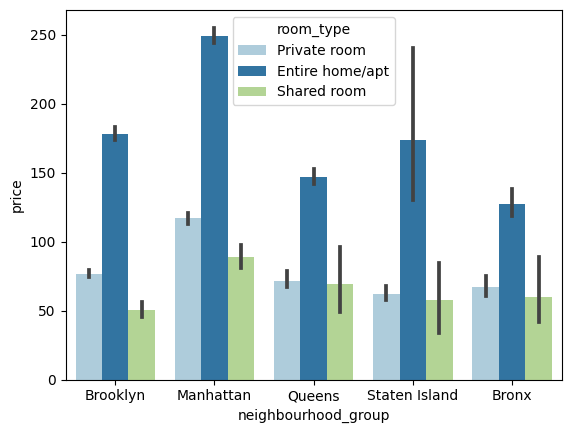

In [ ]:
sns.barplot(data=df,x='neighbourhood_group',y='price',hue='room_type',palette= 'Paired')

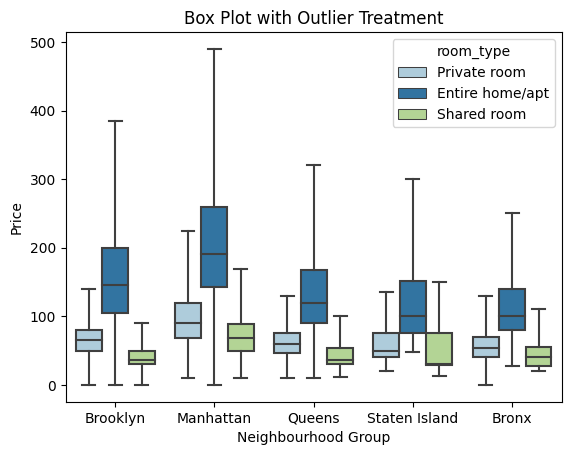

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot with adjusted outlier treatment
sns.boxplot(data=df, x='neighbourhood_group',y='price',hue='room_type', whis=2, showfliers=False,palette= 'Paired')

# Add labels and title
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.title('Box Plot with Outlier Treatment')

# Show the plot
plt.show()

<Axes: xlabel='neighbourhood_group', ylabel='availability_365'>

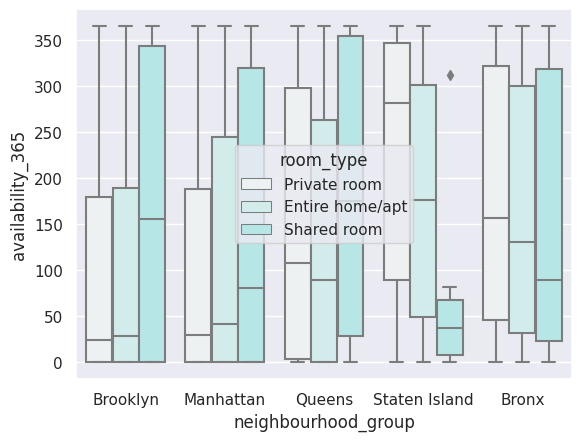

In [ ]:
sns.boxplot(data=df,x='neighbourhood_group',y='availability_365',hue='room_type',color='#AFEEEE')

<ipython-input-45-19119b594b53>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(),annot=True,cmap='viridis')


<Axes: >

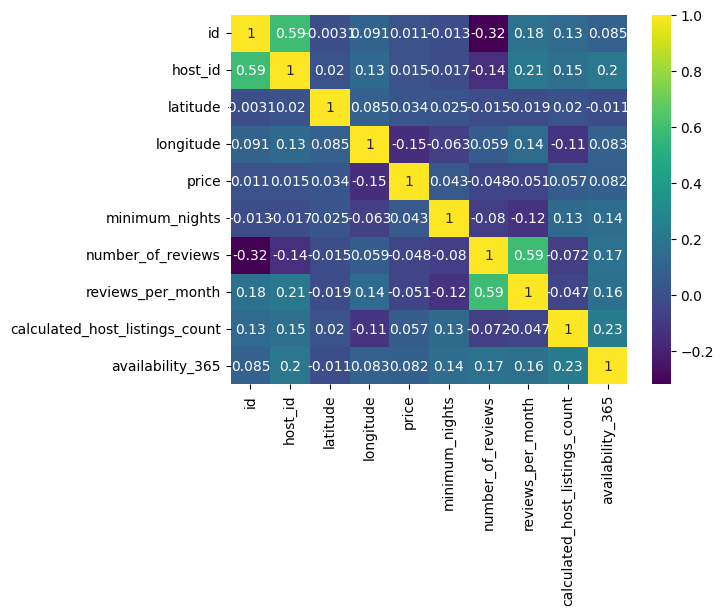

In [ ]:
sns.heatmap(data=df.corr(),annot=True,cmap='viridis')

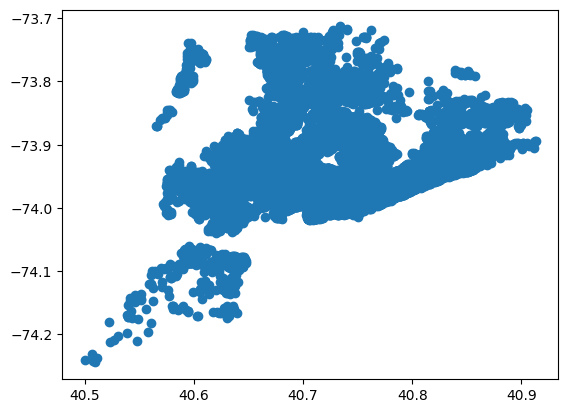

In [ ]:
plt.scatter(df['latitude'],df['longitude'],marker='o')

<Axes: xlabel='longitude', ylabel='latitude'>

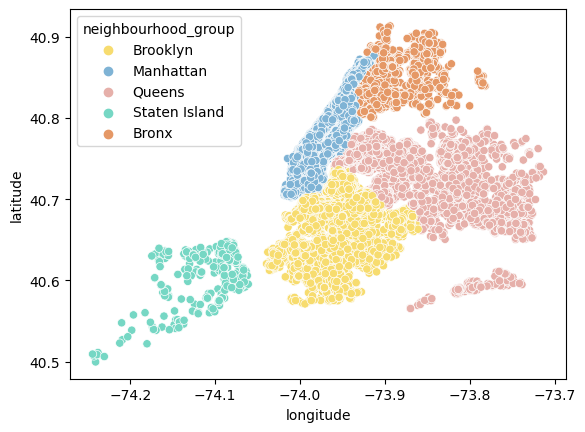

In [ ]:
my_colors=['#F7DC6F','#7FB3D5','#E6B0AA','#76D7C4','#E59866']#    AED6F1 ,,#E6B0AA,queens-F2D7D5
sns.scatterplot(data=df,x='longitude',y='latitude',hue='neighbourhood_group',palette=my_colors)

In [ ]:
df.sort_values(['neighbourhood','neighbourhood_group'])

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
510,182177,A PRIVATE FLAT / APARTMENT- $SPECIAL$,873273,Christian & Carla,Bronx,Allerton,40.86466,-73.85709,Entire home/apt,125,2,271,2019-06-20,2.84,2,347
1167,498120,Hi Traveler.. welcome,2459648,Ellen,Bronx,Allerton,40.86870,-73.85240,Private room,35,7,2,2018-07-23,0.17,1,90
1578,715270,2 Beds/Queen & Full Beautiful Room 40 minsT.Sq...,3684360,Enrique,Bronx,Allerton,40.85956,-73.87067,Private room,39,2,169,2019-06-12,2.07,4,306
1666,755528,PRIVATE BATH/TONS OF SUNLIGHT/SAFE,3684360,Enrique,Bronx,Allerton,40.85840,-73.86969,Entire home/apt,49,2,189,2019-06-23,2.32,4,238
1706,773041,Nice beautiful room In the Bronx,3684360,Enrique,Bronx,Allerton,40.85914,-73.86979,Private room,38,1,187,2019-06-23,2.34,4,241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47203,35634704,WOODSIDE COMFORTABLE ROOM 15 MINUTES FROM THE ...,266792224,Alex,Queens,Woodside,40.74833,-73.90827,Private room,90,2,1,2019-07-01,1.00,1,365
47404,35716084,Private rooms And Matchless Location,233050530,Suleyman,Queens,Woodside,40.74568,-73.90844,Private room,49,2,0,NA,0.00,1,177
47712,35876561,Modern house (2 BR Apt) • 30Mins from Time Squ...,76360760,Christopher,Queens,Woodside,40.74400,-73.90185,Entire home/apt,169,1,0,NA,0.00,1,60
48056,36062221,SHORT TERM STAY,9037589,Rahib,Queens,Woodside,40.74367,-73.91247,Private room,90,1,0,NA,0.00,1,179


In [ ]:
n_count=df.groupby('neighbourhood_group',as_index=False)['neighbourhood'].value_counts()
# n_df=pd.DataFrame(n_count)
# n_df neighbourhood_group
n_count

,neighbourhood_group,neighbourhood,count
0,Bronx,Kingsbridge,70
1,Bronx,Fordham,63
2,Bronx,Longwood,62
3,Bronx,Mott Haven,60
4,Bronx,Wakefield,50
...,...,...,...
216,Staten Island,Richmondtown,1
217,Staten Island,New Dorp,1
218,Staten Island,Fort Wadsworth,1
219,Staten Island,Willowbrook,1


<Axes: xlabel='neighbourhood_group', ylabel='count'>

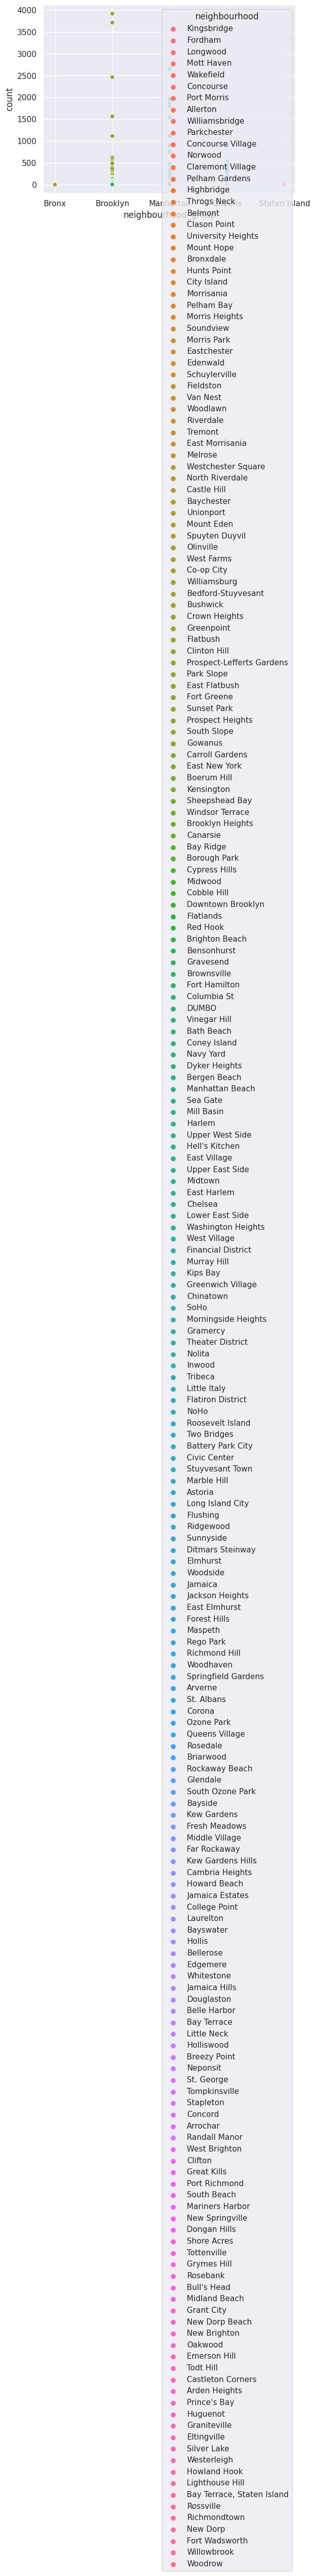

In [ ]:
sns.scatterplot(data=n_count,x='neighbourhood_group',y='count',hue='neighbourhood')

In [ ]:
df.groupby(['neighbourhood_group'])['neighbourhood'].value_counts()

neighbourhood_group  neighbourhood
Bronx                Kingsbridge      70
                     Fordham          63
                     Longwood         62
                     Mott Haven       60
                     Concourse        50
                                      ..
Staten Island        New Dorp          1
                     Richmondtown      1
                     Rossville         1
                     Willowbrook       1
                     Woodrow           1
Name: neighbourhood, Length: 221, dtype: int64

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 72.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 37.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 69.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='neighbourhood_group', ylabel='count'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 77.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 8.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 41.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 74.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


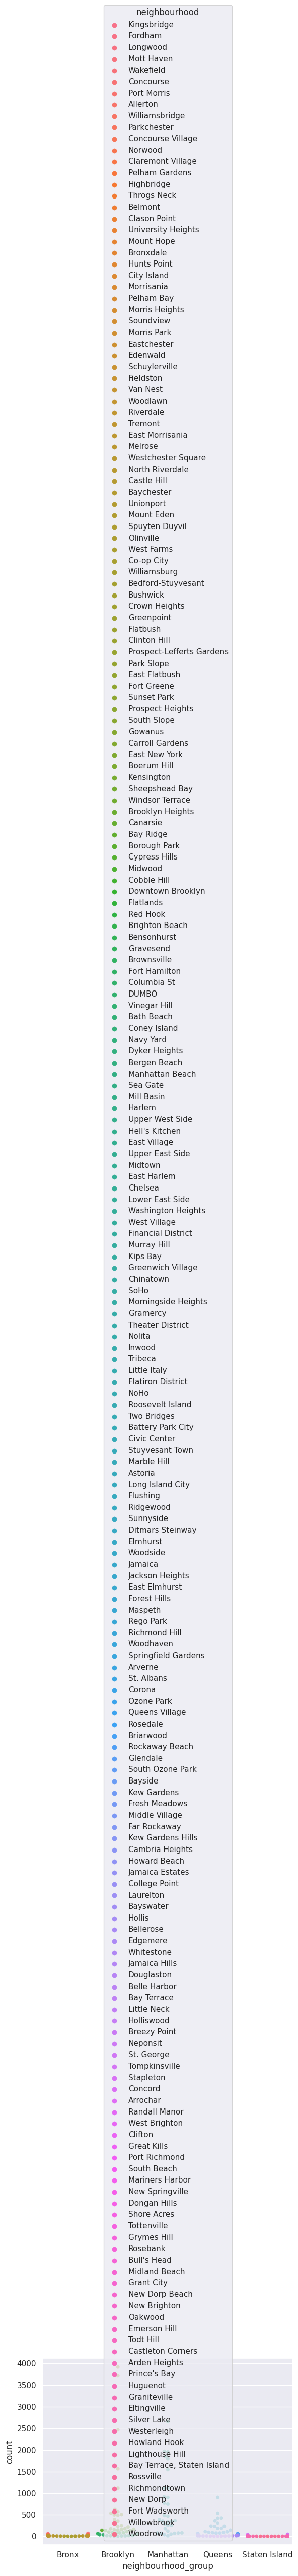

In [ ]:
sns.swarmplot(data=n_count,x='neighbourhood_group',y='count',hue='neighbourhood')

In [ ]:
df.head().T

,0,1,2,3,4
id,2539,2595,3647,3831,5022
name,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,Cozy Entire Floor of Brownstone,Entire Apt: Spacious Studio/Loft by central park
host_id,2787,2845,4632,4869,7192
host_name,John,Jennifer,Elisabeth,LisaRoxanne,Laura
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan
neighbourhood,Kensington,Midtown,Harlem,Clinton Hill,East Harlem
latitude,40.64749,40.75362,40.80902,40.68514,40.79851
longitude,-73.97237,-73.98377,-73.9419,-73.95976,-73.94399
room_type,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt
price,149,225,150,89,80


In [ ]:
df.groupby('host_id').get_group(2787)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
10372,7937553,Riomaggiore Room. Queen Bedroom in Bklyn Townh...,2787,John,Brooklyn,Bensonhurst,40.60951,-73.97622,Private room,99,1,21,2018-10-27,0.50,6,153
13583,10160215,Torre del Lago Room.,2787,John,Brooklyn,Gravesend,40.60755,-73.97410,Private room,79,1,17,2019-06-26,0.40,6,174
13688,10267242,Cinque Terre Room. Clean and Quiet Queen Bedroom,2787,John,Brooklyn,Gravesend,40.60810,-73.97541,Private room,149,1,24,2019-05-11,0.64,6,180
13963,10593675,"La Spezia room. Clean, quiet and comfortable bed",2787,John,Brooklyn,Bensonhurst,40.60951,-73.97642,Shared room,79,1,15,2018-09-29,0.43,6,180
21556,17263207,Brooklyn home. Comfort and clean. Liguria room.,2787,John,Brooklyn,Bensonhurst,40.60877,-73.97382,Private room,49,1,19,2019-06-08,0.70,6,360


In [ ]:
df['host_id'].value_counts()

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
            ... 
23727216       1
89211125       1
19928013       1
1017772        1
68119814       1
Name: host_id, Length: 37457, dtype: int64

In [ ]:
df.groupby('host_id').value_counts().reset_index()

,host_id,id,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,0
0,2438,23669201,Great Price: Williamsburg Brooklyn Loft off L ...,Tasos,Brooklyn,Williamsburg,40.71412,-73.94447,Entire home/apt,95,45,1,2018-03-17,0.06,1,0,1
1,2571,1101224,THE PUTNAM,Teedo,Brooklyn,Bedford-Stuyvesant,40.68674,-73.93845,Entire home/apt,182,9,27,2019-05-21,0.37,1,23,1
2,2787,2539,Clean & quiet apt home by the park,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,1
3,2787,7937553,Riomaggiore Room. Queen Bedroom in Bklyn Townh...,John,Brooklyn,Bensonhurst,40.60951,-73.97622,Private room,99,1,21,2018-10-27,0.50,6,153,1
4,2787,10160215,Torre del Lago Room.,John,Brooklyn,Gravesend,40.60755,-73.97410,Private room,79,1,17,2019-06-26,0.40,6,174,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,274273284,36478343,Welcome all as family,Anastasia,Manhattan,East Harlem,40.78749,-73.94749,Private room,140,1,0,NA,0.00,1,180,1
48891,274298453,36481615,"Peaceful space in Greenpoint, BK",Adrien,Brooklyn,Greenpoint,40.72585,-73.94001,Private room,54,6,0,NA,0.00,1,15,1
48892,274307600,36482783,Brooklyn Oasis in the heart of Williamsburg,Jonathan,Brooklyn,Williamsburg,40.71790,-73.96238,Private room,190,7,0,NA,0.00,1,341,1
48893,274311461,36483010,Comfy 1 Bedroom in Midtown East,Scott,Manhattan,Midtown,40.75561,-73.96723,Entire home/apt,200,6,0,NA,0.00,1,176,1


In [ ]:
hosts=df['host_id'].value_counts().reset_index()
hosts
# df_host=pd.DataFrame(hosts,columns=['hostid','count'])
# df_host
# df_hosts=hosts.to_frame()
# df_hosts

,index,host_id
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
...,...,...
37452,23727216,1
37453,89211125,1
37454,19928013,1
37455,1017772,1


In [ ]:
 # hosts

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
            ... 
23727216       1
89211125       1
19928013       1
1017772        1
68119814       1
Name: host_id, Length: 37457, dtype: int64